## Machine Learning Tutorial 8: Logistic Regression (Multiclass Classification)

Logistic regression is used for classification problems in machine learning. This tutorial will show you how to use `sklearn logisticregression` class to solve multiclass classification problem to predict hand written digit. We will use `sklearn.load_digits` to load readily available dataset from `sklearn` library and train our classifier using that information. 

#### Topics covered:
* Binary classification vs Multiclass classification
* How to identify handwritten digits?
* Solve a problem of hand written digit recognition
* Confusion Matrix (`sklearn.confusion_matrix`)
* Plot confusion matrix using seaborn library
* **Exercise** - Use sklearn iris dataset to predict flower type based on different features using logistic regression

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sn

In [2]:
# Load the digits dataset containing images of handwritten digits
digits = load_digits()

In [3]:
# List all attributes and methods of the digits dataset object
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we'd have to first transform it into a feature vector with length 64.

In [4]:
# Retrieve and display the pixel values for the first digit image in the dataset
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

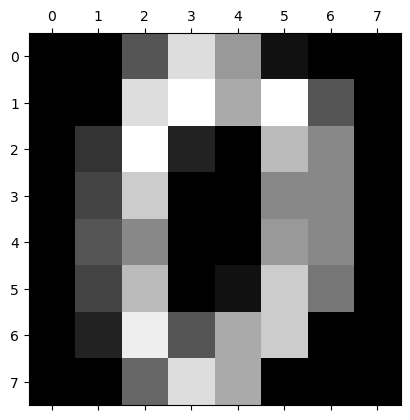

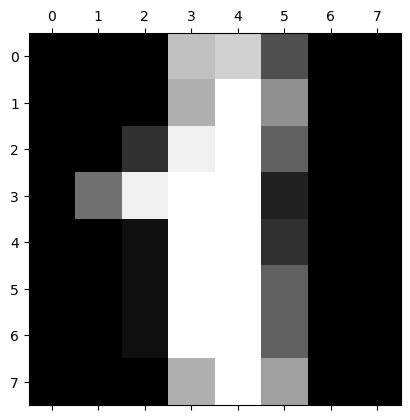

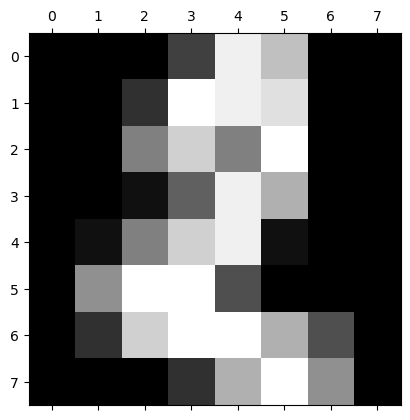

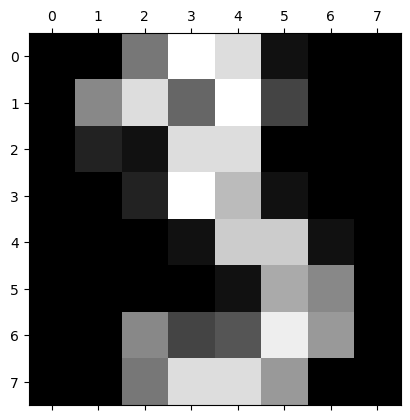

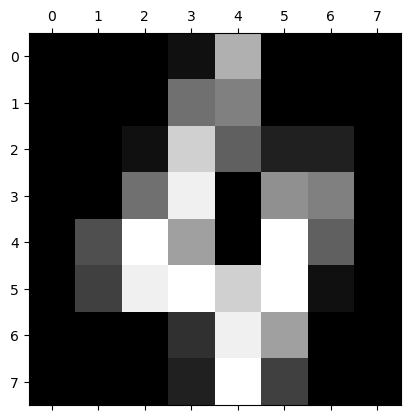

In [8]:
# Set the colormap to grayscale and display the first 5 digit images from the dataset
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [9]:
# Retrieve the labels for the first 5 digit images in the dataset
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [12]:
# Split the digits dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [13]:
len(X_train)

1437

In [14]:
len(X_test)

360

In [17]:
# Create an instance of the LogisticRegression model for classifying the digits dataset
model = LogisticRegression()

In [18]:
# Train the LogisticRegression model using the training data
model.fit(X_train, y_train)

C:\Users\Vaishob\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(X_test, y_test)

0.9666666666666667

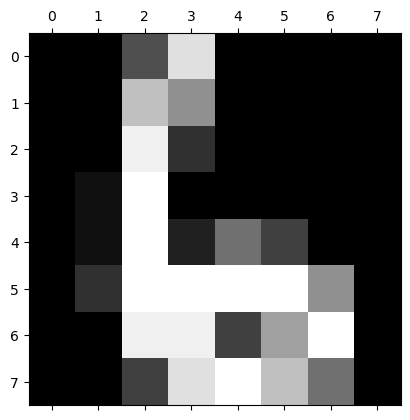

In [20]:
# Display the 68th digit image from the dataset as an 8x8 grid
plt.matshow(digits.images[67])

In [21]:
# Retrieve the actual digit label for the 68th image in the dataset
digits.target[67]

6

In [22]:
# Predict the digit represented by the 68th image in the dataset using the trained model
model.predict([digits.data[67]])

array([6])

In [24]:
# Predict the digits represented by the first 5 images in the dataset using the trained model
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [27]:
# Generate predictions for the test set using the trained logistic regression model
y_predicted = model.predict(X_test)

In [28]:
# Generate the confusion matrix to evaluate the performance of the model on the test set
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 38]], dtype=int64)

### Confusion Matrix Interpretation

The confusion matrix below represents the classification results for digits 0-9:

```
array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],  # Digit '0'
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  1],  # Digit '1'
       [ 0,  1, 30,  0,  0,  0,  0,  0,  0,  0],  # Digit '2'
       [ 0,  0,  0, 35,  0,  2,  0,  0,  0,  0],  # Digit '3'
       [ 0,  0,  0,  0, 37,  0,  0,  0,  1,  0],  # Digit '4'
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],  # Digit '5'
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],  # Digit '6'
       [ 0,  1,  0,  0,  0,  0,  0, 20,  0,  0],  # Digit '7'
       [ 0,  1,  1,  0,  1,  0,  0,  0, 40,  0],  # Digit '8'
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 38]], # Digit '9'
      dtype=int64)
```

#### Key Points:
- **Diagonal Elements**: The diagonal elements represent correct predictions. For example, the model correctly classified:
  - 30 images of digit '0' as '0'.
  - 42 images of digit '1' as '1'.
  - 30 images of digit '2' as '2'.
  
- **Off-Diagonal Elements**: These indicate misclassifications. For example:
  - 1 image of digit '1' was incorrectly classified as '9'.
  - 2 images of digit '3' were incorrectly classified as '5'.
  - 1 image of digit '7' was incorrectly classified as '1'.
  - Digit '8' had several misclassifications: it was predicted as '1', '2', and '4' each once.

#### Summary:
- The model performed well, as most predictions are on the diagonal, indicating correct classifications.
- Some digits (e.g., '3', '8') had more frequent misclassifications, which could suggest areas for model improvement.

Text(95.72222222222221, 0.5, 'Truth')

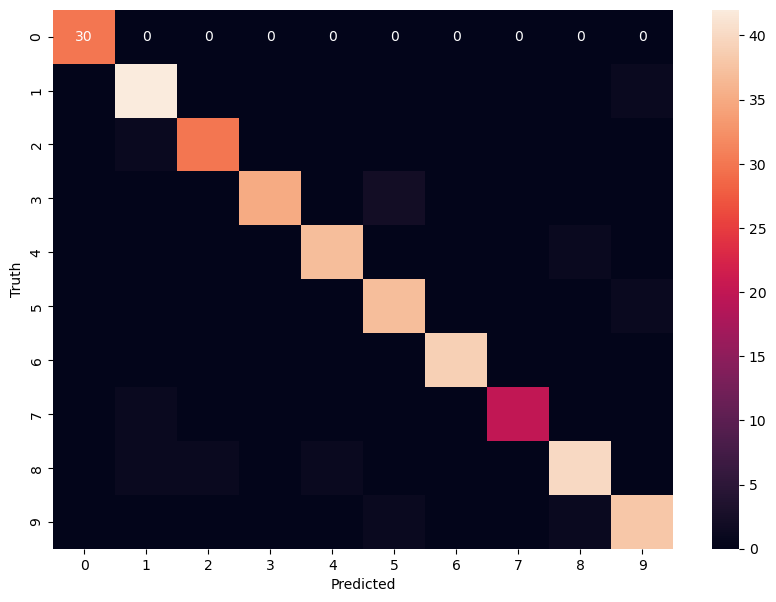

In [30]:
# Plot a heatmap of the confusion matrix with annotations, and label the axes
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Exercise

Use `sklearn.datasets` iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. in iris dataset there are 150 samples containing following features:

* `Sepal Length`
* `Sepal Width`
* `Petal Length`
* `Petal Width`

Using above 4 features, you will classify a flower in one of the three categories:

* **Setosa**
* **Versicolour**
* **Virginica**

In [36]:
# Load the iris dataset
iris = load_iris()

In [37]:
X = iris.data

In [38]:
y = iris.target

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Initialize the logistic regression model
model = LogisticRegression()

In [43]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

* `0` represents **Setosa** 
* `1` represents **Versicolour**
* `2` represents **Virginica**

In [46]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

The logistic regression model achieved an accuracy of **100%** on the test set.